In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [6]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208041 entries, 0 to 208040
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208041 non-null  int64  
 1   season                  208041 non-null  int64  
 2   start_date              208041 non-null  object 
 3   venue                   208041 non-null  object 
 4   innings                 208041 non-null  int64  
 5   ball                    208041 non-null  float64
 6   batting_team            208041 non-null  object 
 7   bowling_team            208041 non-null  object 
 8   striker                 208041 non-null  object 
 9   non_striker             208041 non-null  object 
 10  bowler                  208041 non-null  object 
 11  runs_off_bat            208041 non-null  int64  
 12  extras                  208041 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [9]:
rcb_df = df[df['batting_team']=='Royal Challengers Bangalore']

In [10]:
runs_df = pd.DataFrame(rcb_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [11]:
runs_df = runs_df[runs_df['runs_off_bat']>600]

In [12]:
runs_df

,striker,runs_off_bat
0,V Kohli,6293
1,AB de Villiers,4510
2,CH Gayle,3175
3,JH Kallis,1132
4,R Dravid,898
5,D Padikkal,884
6,PA Patel,731


In [32]:
batting_positions_rcb = ['Opening','4','Opening','3','3','Opening','Opening']

In [33]:
runs_df['Batting Position']=batting_positions_rcb

In [34]:
runs_df

,striker,runs_off_bat,Batting Position
0,V Kohli,6293,Opening
1,AB de Villiers,4510,4
2,CH Gayle,3175,Opening
3,JH Kallis,1132,3
4,R Dravid,898,3
5,D Padikkal,884,Opening
6,PA Patel,731,Opening


In [35]:
import matplotlib.pyplot as plt

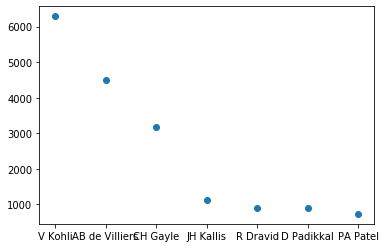

In [36]:
plt.scatter(runs_df['striker'],runs_df['runs_off_bat'])
plt.show()

In [37]:
pos_df = pd.DataFrame(runs_df.groupby('Batting Position').count()).reset_index()

In [38]:
pos_df

,Batting Position,striker,runs_off_bat
0,3,2,2
1,4,1,1
2,Opening,4,4


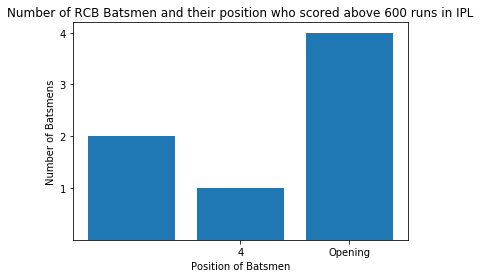

In [39]:
plt.xticks(range(1,12))
plt.yticks(range(1,10))
plt.title("Number of RCB Batsmen and their position who scored above 600 runs in IPL")
plt.xlabel("Position of Batsmen")
plt.ylabel("Number of Batsmens")
plt.bar(pos_df['Batting Position'],pos_df['striker'])
plt.show()


In [21]:
csk_df = df[df['batting_team']=='Chennai Super Kings']

In [22]:
csk_runs_df = pd.DataFrame(csk_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [23]:
csk_runs_df

,striker,runs_off_bat
0,SK Raina,4695
1,MS Dhoni,4172
2,F du Plessis,2721
3,MEK Hussey,1768
4,M Vijay,1708
...,...,...
57,AS Rajpoot,2
58,S Randiv,2
59,MA Wood,1
60,A Nehra,1


In [24]:
csk_runs_df = csk_runs_df[csk_runs_df['runs_off_bat']>600]

In [25]:
csk_runs_df

,striker,runs_off_bat
0,SK Raina,4695
1,MS Dhoni,4172
2,F du Plessis,2721
3,MEK Hussey,1768
4,M Vijay,1708
5,AT Rayudu,1500
6,S Badrinath,1441
7,RA Jadeja,1324
8,SR Watson,1252
9,ML Hayden,1107


In [29]:
batting_pos_csk = ['3','5','3','Opening','Opening','3','4','7','Opening','Opening','6','Opening','Opening','Opening','7']

In [30]:
csk_runs_df["Batting Position"]=batting_pos_csk

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
csk_runs_df

,striker,runs_off_bat,Batting Position
0,SK Raina,4695,3
1,MS Dhoni,4172,5
2,F du Plessis,2721,3
3,MEK Hussey,1768,Opening
4,M Vijay,1708,Opening
5,AT Rayudu,1500,3
6,S Badrinath,1441,4
7,RA Jadeja,1324,7
8,SR Watson,1252,Opening
9,ML Hayden,1107,Opening


In [40]:
csk_pos_df = pd.DataFrame(csk_runs_df.groupby('Batting Position').count()).reset_index()

In [41]:
csk_pos_df

,Batting Position,striker,runs_off_bat
0,3,3,3
1,4,1,1
2,5,1,1
3,6,1,1
4,7,2,2
5,Opening,7,7


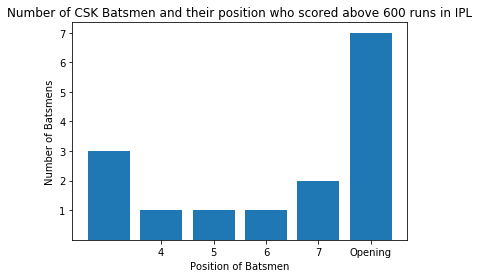

In [42]:
plt.xticks(range(1,12))
plt.yticks(range(1,10))
plt.title("Number of CSK Batsmen and their position who scored above 600 runs in IPL")
plt.xlabel("Position of Batsmen")
plt.ylabel("Number of Batsmens")
plt.bar(csk_pos_df['Batting Position'],csk_pos_df['striker'])
plt.show()


In [43]:
# plt.scatter(csk_runs_df['striker'],csk_runs_df['runs_off_bat'])
# plt.show()

In [44]:
mi_df = df[df['batting_team']=='Mumbai Indians']

In [45]:
mi_runs_df = pd.DataFrame(mi_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [46]:
mi_runs_df

,striker,runs_off_bat
0,RG Sharma,4443
1,KA Pollard,3293
2,AT Rayudu,2416
3,SR Tendulkar,2333
4,SA Yadav,1733
...,...,...
99,C Nanda,0
100,M Jansen,0
101,PJ Sangwan,0
102,PP Chawla,0


In [47]:
mi_runs_df = mi_runs_df[mi_runs_df['runs_off_bat']>600]

In [48]:
mi_runs_df

,striker,runs_off_bat
0,RG Sharma,4443
1,KA Pollard,3293
2,AT Rayudu,2416
3,SR Tendulkar,2333
4,SA Yadav,1733
5,HH Pandya,1485
6,Q de Kock,1332
7,KH Pandya,1143
8,Ishan Kishan,1133
9,LMP Simmons,1079


In [49]:
mi_pos = ['4','5','3','Opening','3','6','Opening','7','4','Opening','Opening','8','Opening','5','4','Opening']

In [50]:
mi_runs_df["Batting Position"]=mi_pos

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
mi_runs_df

,striker,runs_off_bat,Batting Position
0,RG Sharma,4443,4
1,KA Pollard,3293,5
2,AT Rayudu,2416,3
3,SR Tendulkar,2333,Opening
4,SA Yadav,1733,3
5,HH Pandya,1485,6
6,Q de Kock,1332,Opening
7,KH Pandya,1143,7
8,Ishan Kishan,1133,4
9,LMP Simmons,1079,Opening


In [52]:
mi_pos_df = pd.DataFrame(mi_runs_df.groupby('Batting Position').count()).reset_index()

In [53]:
mi_pos_df

,Batting Position,striker,runs_off_bat
0,3,2,2
1,4,3,3
2,5,2,2
3,6,1,1
4,7,1,1
5,8,1,1
6,Opening,6,6


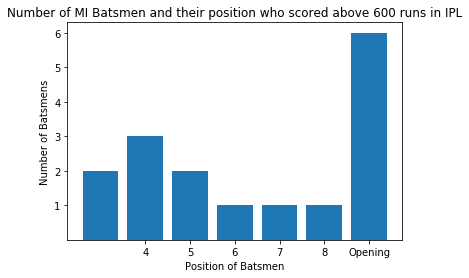

In [54]:
plt.xticks(range(1,12))
plt.yticks(range(1,10))
plt.title("Number of MI Batsmen and their position who scored above 600 runs in IPL")
plt.xlabel("Position of Batsmen")
plt.ylabel("Number of Batsmens")
plt.bar(mi_pos_df['Batting Position'],mi_pos_df['striker'])
plt.show()

In [1]:
# fig, axs = plt.subplots(2, 2)
# # axs[0,0].xticks(range(1,12))
# # axs[0,0].yticks(range(1,12))
# axs[0,0].set_title("RCB")
# # axs[0,0].xlabel("Position of Batsmen")
# # axs[0,0].ylabel("Number of Batsmens")
# axs[0,0].bar(mi_pos_df['Batting Position'],mi_pos_df['striker'])

# Conclusions

In [57]:
#Through this ananlysis one can understand why RCB is not winning IPL. 
#From the output graph it is clear that RCB is dependent on their top order. 
#No low order batsmen scored above 600 runs in all IPL seasons, whereas if we see the teams like CSK and MI they don't 
#depend on specific order batsmen. 
#Their all batsmen are performing good. They have very batting depth. IPL is batsmen's game.So they are super consistent in IPL. 
#Together they have won 9 IPL trophies.